## Introduction

The 21st century has seen a sharp increase in the importance of climate change, which is defined by notable changes in global temperature, precipitation patterns, and extreme weather occurrences. Sea level rise is one of the most significant and obvious effects of climate change. This phenomena, which is caused by the melting of glaciers and polar ice caps as well as the thermal expansion of saltwater, is quite dangerous for coastal communities all over the world. The risk of flooding, erosion, and permanent inundation increases as sea levels rise, possibly resulting in the submergence of large urban areas. This study will show from 1990 till 2020 . In this report we will invistiage if it is possible to say that some cities in the near future will sink ? 


## Motivation

## Data Processing Pipeline

## Overview
The data processing pipeline aims to gather, filter, and prepare two distinct datasets related to global temperatures and Sea level. The pipeline consists of several stages, including data download, cleaning, filtering, and merging, ultimately resulting in a consolidated dataset for further analysis. Pipeline Steps

 1. Temperature Change dataset 
 2. Sea Level Dataset

  1.1 Data Download 

  The process begins with the download of global temperature data and sea level data from a reliable source. Pipeline.py is able to downlaod the datasets from open souce datesets. 

1.2 Data Cleaning and Filtering 


For the cleaning

we need to remove Nan rows that in the two datasets and remove the uncessary columns that will not be used such as Objectid and Unit etc.



1.3 Data Processing 

we had to change the date formating in the sea level so we get the mean for each year and for the temperature datasets we need to change the datasets for each year. 


1.4 Saving and Retrieval


The cleaned data will be merged and then saved the merged the datasets into sqlite3 and in the notebook and will retreive the dataset from sqlite3 with pandas .


Result and Recmmendations 


The merged dataset is saved for further analysis, leading to the exploration of the correlation between Temperature  change and Sea level dataset. The resulting insights contribute to a deeper understanding of the environmental landscape and potential implications for climate change and sea level change.


## Data Visualization for Temperature Change and Sea level Change

In [28]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
conn = sqlite3.connect('../data/temperature_sea_level_data.db')
# Load the merged dataset from the SQLite database
merged_data = pd.read_sql_query("SELECT * FROM Temperature_Sea_Level", conn)
conn.close()

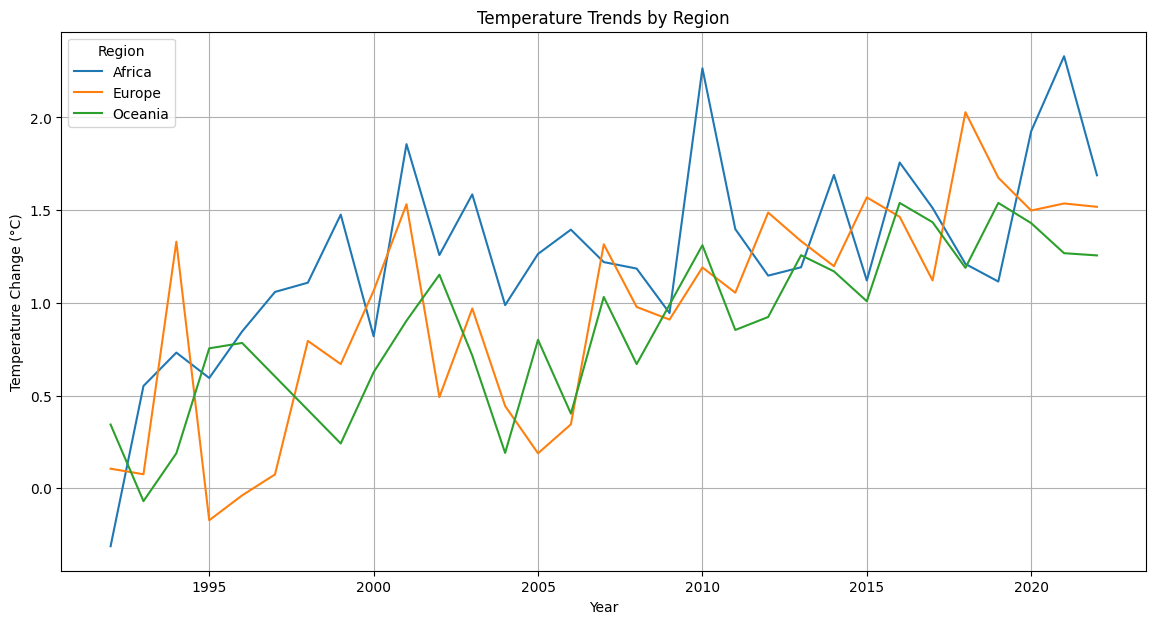

In [30]:
country_to_region = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    # Add more mappings as needed
}
merged_data['Region'] = merged_data['Country'].map(country_to_region)

# Drop rows with no region mapping
merged_data = merged_data.dropna(subset=['Region'])

# Calculate the average temperature change for each region over the years
regional_trends = merged_data.groupby(['Year', 'Region'])['Temperature_Change'].mean().reset_index()

# Plot the temperature trends by region
plt.figure(figsize=(14, 7))
sns.lineplot(data=regional_trends, x='Year', y='Temperature_Change', hue='Region')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.title('Temperature Trends by Region')
plt.legend(title='Region')
plt.grid(True)
plt.show()

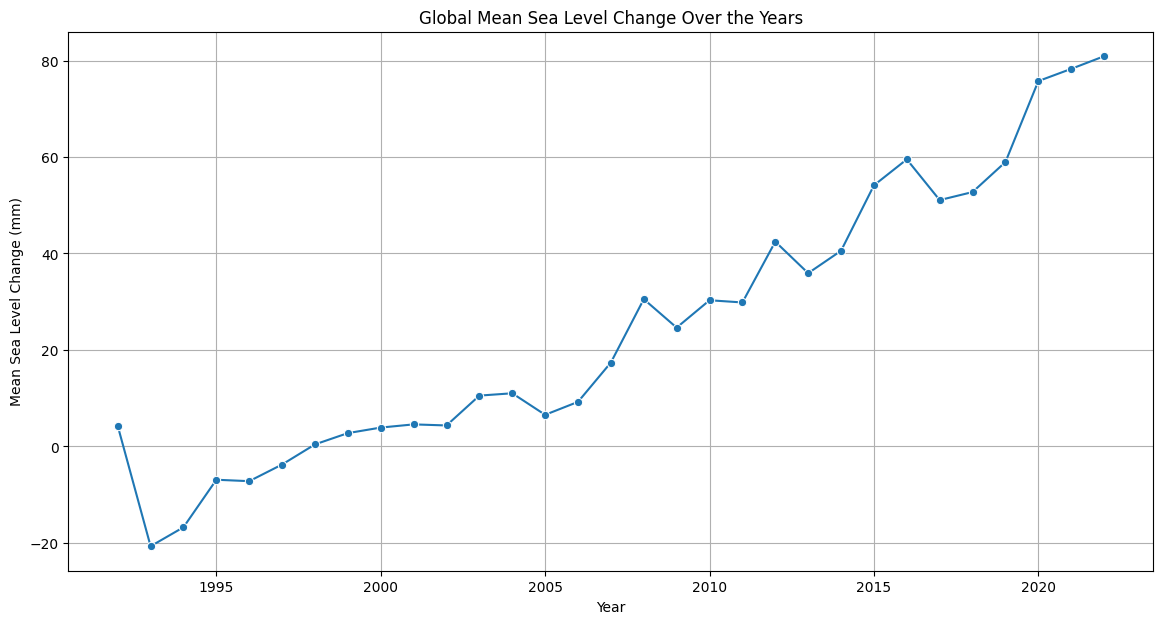

In [31]:

global_sea_level_trends = merged_data.groupby('Year')['Mean_Sea_Level_Change'].mean().reset_index()

# Plot the global sea level trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_sea_level_trends, x='Year', y='Mean_Sea_Level_Change', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level Change (mm)')
plt.title('Global Mean Sea Level Change Over the Years')
plt.grid(True)
plt.show()

Overview : 

This report explores the visualization of average temperature change over the years and the sea level change mean over the years. 

The First Graph shows Temperature change over the years based on the Region , but we see that the temperature will be increaed over the years for all three types of regions that we have .


For the Second Graph we also Noticed that the the sea level increases over the years and this result is expected as the change of temperature increaed which leads to increase the rate of ice melt .

## Data Visualization Report: Correlation Between Temperature change and Climate Change

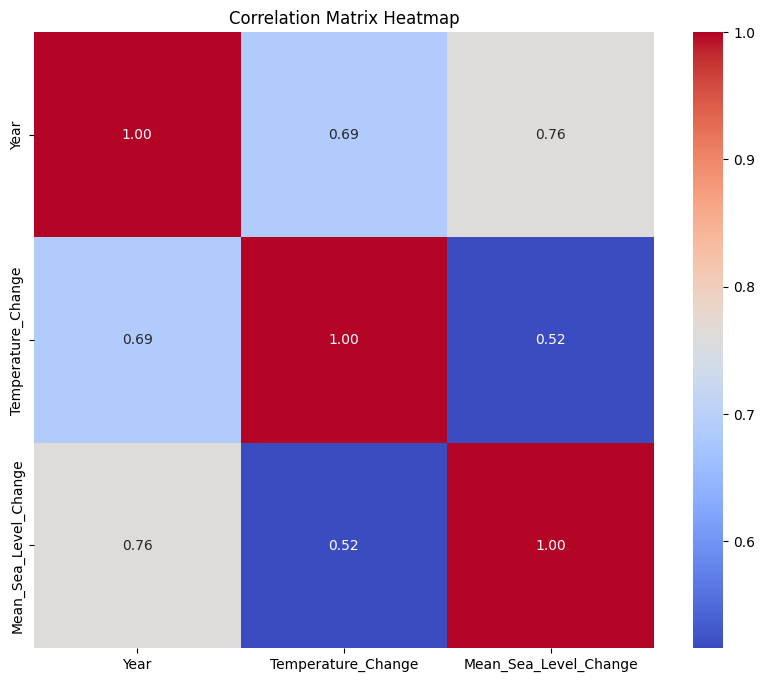

In [33]:
numeric_data = merged_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation Overview  :


based on the heatmap on the dataset we see that there is a postive correlation between Temerature change and the mean sea level change which is [.52] which is a intermediate correlation between the two factors

,Year,Temperature_Change,Mean_Sea_Level_Change
Year,1.000000,0.687155,0.761866
Temperature_Change,0.687155,1.000000,0.516008
Mean_Sea_Level_Change,0.761866,0.516008,1.000000
